In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.special import softmax


from random import sample
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle("dataframes/short_features_logits.pkl")

In [4]:
df["Predicted Class"] = [np.argmax(softmax(l)) for l in df["Logits"]]

In [5]:
counts = df.groupby(by=["Network Name", "Distribution", "Class Idx", "Predicted Class"]).count().reset_index()
counts["Confusion Rate"] = counts.groupby(by=["Network Name", "Distribution", "Class Idx"])["Predicted Class"].apply(lambda x: x / sum(x)).reset_index()["Predicted Class"].to_numpy()
# confuse_count = df.groupby(by=["Network Name", "Distribution", "Class Idx", "Predicted Class"]).count().reset_index()

In [6]:
def plot_confusion(x, y, z, **kwargs):
    data = np.zeros(shape=(100, 100))
    data[x, y] = z
    sns.heatmap(data, vmin=0, vmax=1, **kwargs)

In [7]:
# cmap = sns.diverging_palette(220, 0, as_cmap=True)


In [9]:
counts["Net"] = counts["Network Name"]
counts["Distr."] = counts["Distribution"]

Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted
Plotted


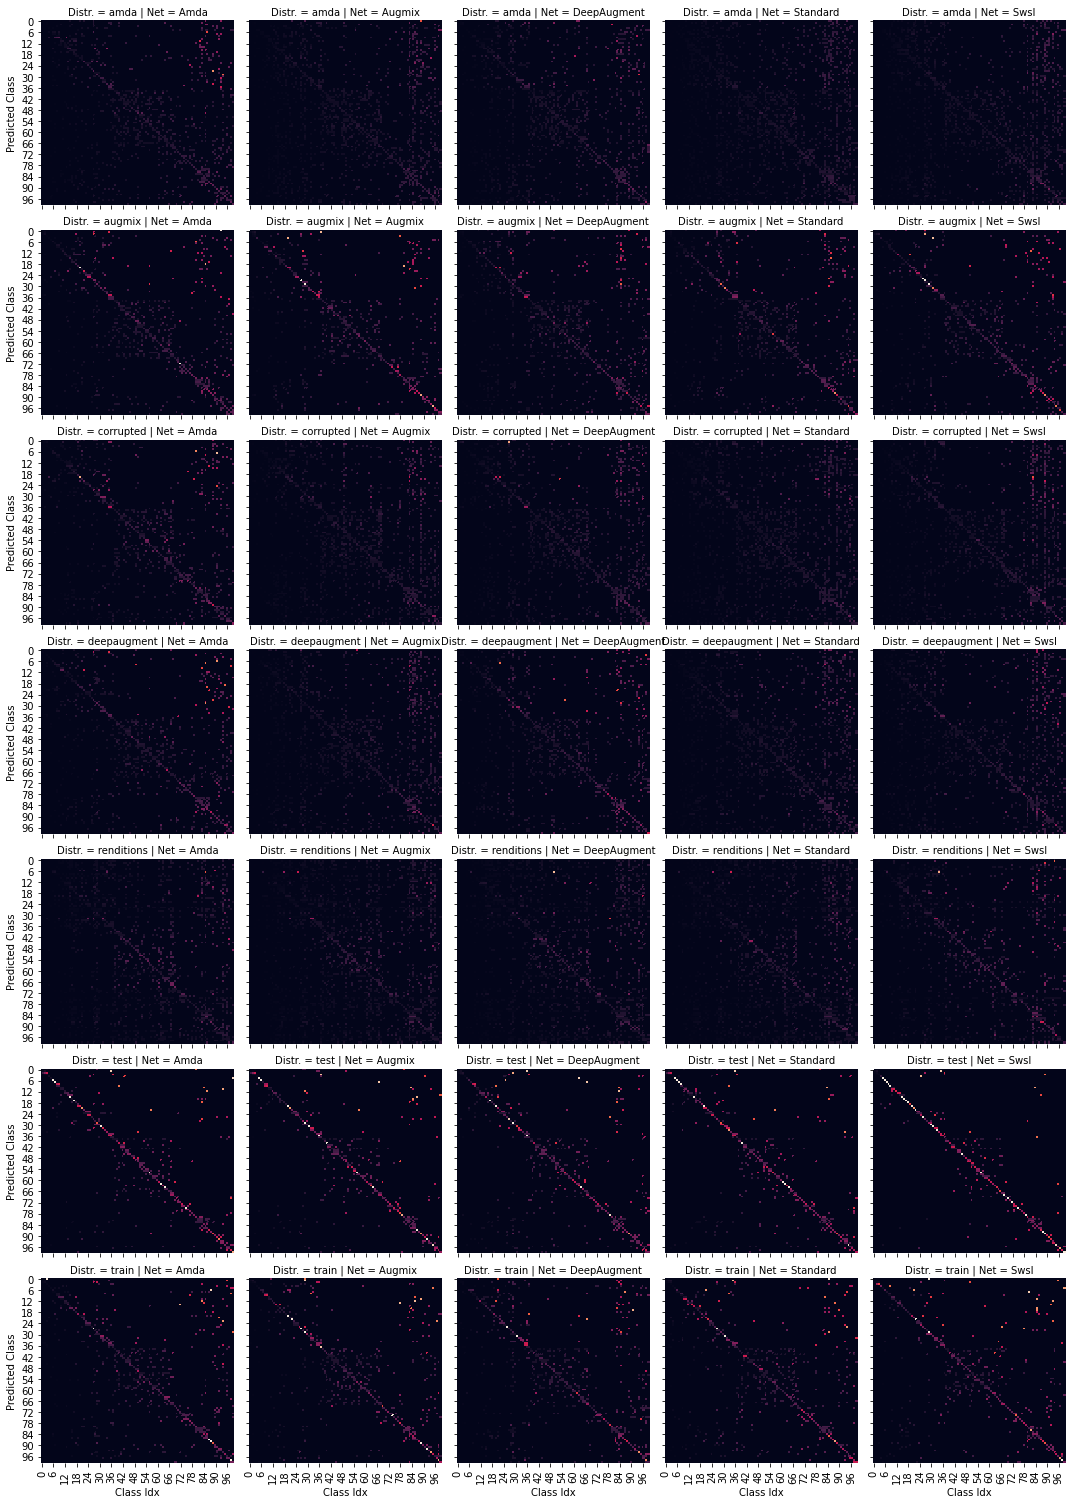

In [10]:
g = sns.FacetGrid(counts, col="Net", row="Distr.")
g.map(plot_confusion, "Class Idx", "Predicted Class", "Confusion Rate", cbar=False)